In [128]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
lynx = np.array([
[209.70, 368.42], [157.63, 332.16], [118.82, 284.21], [80.95, 224.56], [43.08, 244.44], [20.36, 266.67], [-4.26, 293.57], [2.37, 263.16], [-20.36, 292.40], [-39.29, 299.42], [-21.30, 259.65],
[-50.65, 267.84], [-39.29, 242.11], [-55.38, 240.94], [-100.83, 300.58], [-149.11, 345.03], [-172.78, 361.40], [-189.82, 300.58], [-192.66, 225.73], [-181.30, 145.03], [-168.05, 104.09], [-184.14, 66.67], [-186.98, 31.58], [-183.20, 3.51], [-208.76, -4.68], [-197.40, -29.24], [-182.25, -44.44], [-203.08, -43.27], [-172.78, -92.40], [-131.12, -126.32], [-101.78, -147.37], [-74.32, -163.74], [-110.30, -224.56], [-143.43, -287.72], [-161.42, -240.94], [-282.60, -221.05], [-388.64, -205.85], [-370.65, -301.75], [-339.41, -397.66], [18.46, -397.66], [345.09, -400.00], [359.29, -378.95], [367.81, -342.69], [346.98, - 362.57], [363.08, -302.92], [357.40, -243.27], [348.88, -266.67], [336.57, -201.17], [290.18, -135.67], [240.00, -118.13], [258.93, -164.91], [257.99, -228.07], [252.31, -271.35], [256.09, -333.33], [247.57, -359.06], [230.53, -307.60], [194.56, -238.60], [160.47, -181.29], [120.71, -149.71], [165.21, -132.16], [201.18, -100.58], [183.20, -99.42], [221.07, -73.68], [253.25, -24.56], [222.01, -23.39], [251.36, -1.17], [262.72, 24.56], [234.32, 25.73], [214.44, 42.11], [202.13, 60.82], [220.12, 101.75], [234.32, 160.23], [240.00, 230.41], [232.43, 316.96]
])

In [36]:
def plot_diff(X, X_changed, title):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(X[:, 0], X[:, 1], 'o-', label='Original data')
    ax[0].set_title("Before changes")
    ax[0].grid(True)
    ax[1].plot(X_changed[:, 0], X_changed[:, 1], 'o-', label='After changes')
    ax[1].set_title("After changes")
    ax[1].grid(True)
    xmin = min(X[:,0].min(), X_changed[:,0].min())
    xmax = max(X[:,0].max(), X_changed[:,0].max())
    ymin = min(X[:,1].min(), X_changed[:,1].min())
    ymax = max(X[:,1].max(), X_changed[:,1].max())

    for a in ax:
        a.set_xlim(xmin, xmax)
        a.set_ylim(ymin, ymax)

    plt.suptitle(title)
    plt.show()

In [38]:
def stretch(X, a, b):
    X_cp = X.copy()
    transformation = np.array([[a,0], [0, b]])
    plot_diff(X_cp, X_cp.dot(transformation.T), 'Stretched')
    return X_cp.dot(transformation.T), transformation

In [39]:
def shear(X, a, b):
    X_cp = X.copy()
    transformation = np.array([[1, a], [b, 1]])
    plot_diff(X_cp, X_cp.dot(transformation.T), 'Sheared')
    return X_cp.dot(transformation.T), transformation

In [40]:
def reflection(X, a, b):
    X_cp = X.copy()
    denominator = (a ** 2 + b ** 2)
    transformation = (1/denominator)*np.array([[a**2 - b**2, 2*a*b],[2*a*b, b**2 - a**2]])
    plot_diff(X_cp, X_cp.dot(transformation.T), 'Reflected')
    return X_cp.dot(transformation.T), transformation

In [41]:
def rotation(X,theta):
    X_cp = X.copy()
    transformation = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    plot_diff(X_cp, X_cp.dot(transformation.T), 'Rotated')
    return X_cp.dot(transformation.T), transformation

In [48]:
def run_task1(X, a, b, theta):
    print("Task 1")
    stretched, M_s = stretch(X, a, b)

    sheared, M_h = shear(X, a, b)

    reflected, M_r =  reflection(X, a, b)

    rotated, M_r = rotation(X, theta)

Task 1


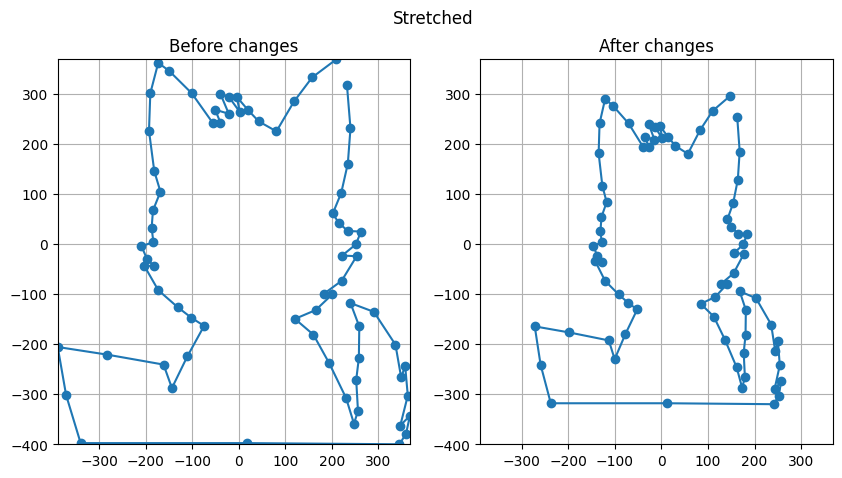

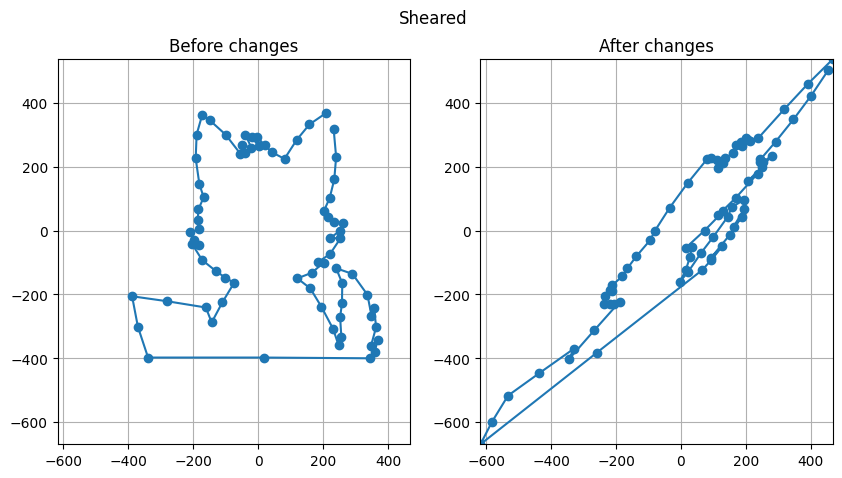

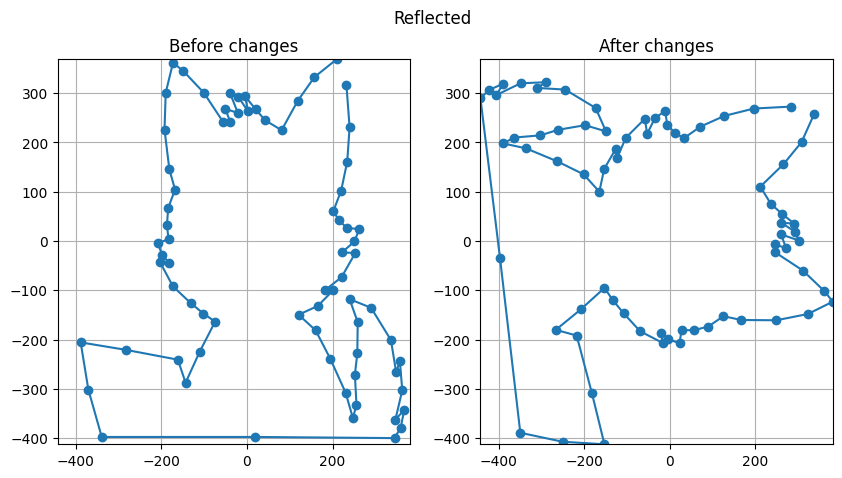

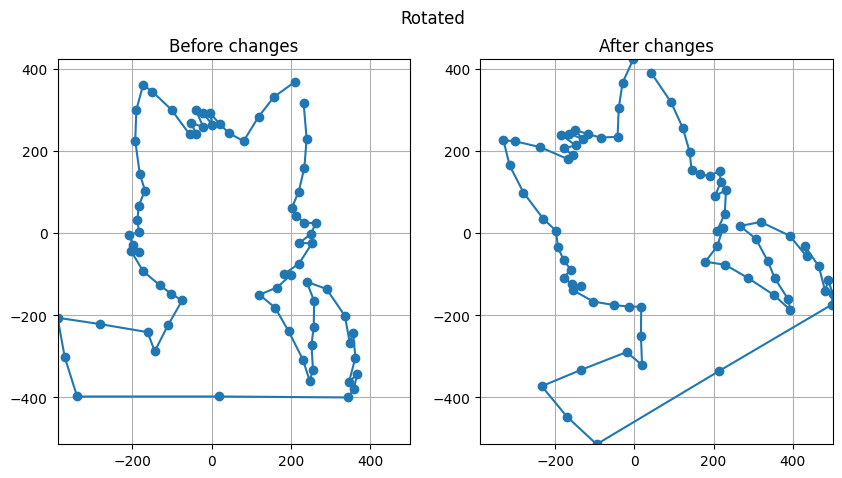

In [51]:
#run_task1(lynx, 0.7, 0.8, np.pi/6)